# Handwritten Digit Recognition with TensorFlow

**Project Overview:**
In this notebook, I built a **Deep Learning** model to recognize handwritten digits (0-9). I will use the famous **MNIST dataset**, which contains 60,000 training images and 10,000 testing images of handwritten numbers.

**Key Concepts Covered:**
* **Data Preprocessing:** Flattening images and normalizing pixel values.
* **One-Hot Encoding:** Converting categorical labels into binary vectors.
* **Neural Network Architecture:** Building a Feed-Forward Network (MLP) using Keras `Dense` layers.
* **Evaluation:** Testing model accuracy on unseen data.

**Tech Stack:**
* `TensorFlow` & `Keras` (Deep Learning)
* `Matplotlib` (Visualization)
* `NumPy` (Matrix Operations)

---

# Import Libraries
**TensorFlow** and **Keras** to build and train the neural network. 
* `mnist`: The dataset of handwritten digits.
* `Sequential`: The container for our neural network layers.
* `Dense`, `Flatten`: The types of layers we will use.
* `to_categorical`: Used for one-hot encoding the labels.
* `matplotlib`: Used to visualize the digits.

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

2025-12-04 13:48:29.559287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764856109.826872      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764856109.905687      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the Dataset
Load the MNIST dataset, which is split into:
* **Training set:** 60,000 images used to teach the model.
* **Testing set:** 10,000 images used to validate performance.

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Number of training images: {len(x_train)}")
print(f"Number of testing images: {len(x_test)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training images: 60000
Number of testing images: 10000


### Visualize a Sample Image
Before processing, it is important to check the data. Here I verify that the image data matches its label.

This image is supposed to be the number: 5


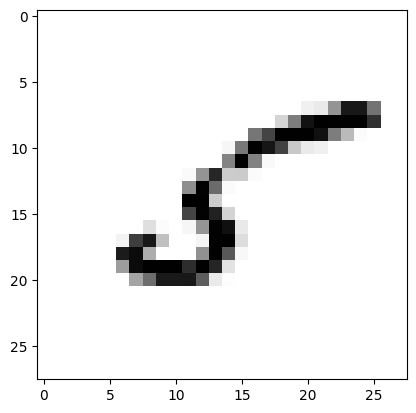

In [3]:
image_index = 11

print(f"This image is supposed to be the number: {y_train[image_index]}")

# Display the image
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

## Data Preprocessing
Need to prepare the data for the neural network:
1.  **Reshape:** Flatten the 28x28 images into a single vector of 784 pixels (28 * 28 = 784).
2.  **Normalize:** Scale the pixel values from 0-255 to a range of 0-1 (floats). This helps the model converge faster.
3.  **One-Hot Encode:** Convert the labels (e.g., "5") into a binary category vector (e.g., `[0, 0, 0, 0, 0, 1, 0...]`).

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"New shape of training images: {x_train.shape}")
print(f"Example of the first one-hot encoded label (which was a 5): \n{y_train[0]}")

New shape of training images: (60000, 784)
Example of the first one-hot encoded label (which was a 5): 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Build the Neural Network
I defined a simple **Feed-Forward Neural Network** (MLP):
* **Input Layer:** Expects a flattened vector of 784 pixels.
* **Hidden Layer:** 128 neurons with `relu` activation to capture patterns.
* **Output Layer:** 10 neurons (one for each digit 0-9) with `softmax` activation to output probabilities.

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-04 13:48:47.457172: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the Model
* **Optimizer:** `adam` (an adaptive learning rate optimizer).
* **Loss Function:** `categorical_crossentropy` (standard for multi-class classification).
* **Epochs:** I iterate over the entire dataset 5 times.

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8766 - loss: 0.4348 - val_accuracy: 0.9571 - val_loss: 0.1360
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9640 - loss: 0.1193 - val_accuracy: 0.9701 - val_loss: 0.0918
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9781 - loss: 0.0742 - val_accuracy: 0.9724 - val_loss: 0.0876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0549 - val_accuracy: 0.9775 - val_loss: 0.0748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9769 - val_loss: 0.0722


## Evaluate Performance
I tested the model on the **Test Set** (data the model has never seen before) to ensure it hasn't just memorized the training data (overfitting).

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0836

Test Accuracy: 97.69%


### Visualizing a Prediction
Let's pick a random image from the test set, visualize it, and see what the model predicts.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


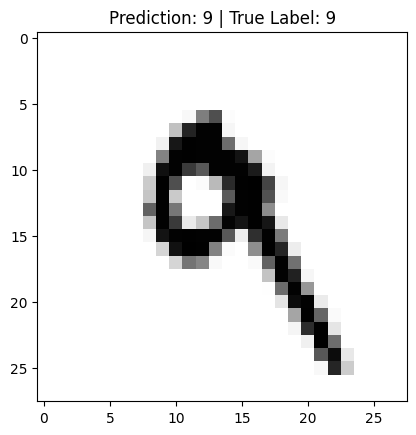

In [12]:
image_index = 7
image_to_predict = x_test[image_index]
true_label = np.argmax(y_test[image_index]) # Get the actual number

prediction = model.predict(np.array([image_to_predict]))
predicted_digit = np.argmax(prediction)

plt.imshow(image_to_predict.reshape(28, 28), cmap='Greys')
plt.title(f"Prediction: {predicted_digit} | True Label: {true_label}")
plt.show()

## Test with a Custom Image
Here I will load an external image (e.g., one you drew yourself), preprocess it to match the training data format (grayscale, 28x28 size), and ask the model to predict the digit.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The model predicts the digit is: 3


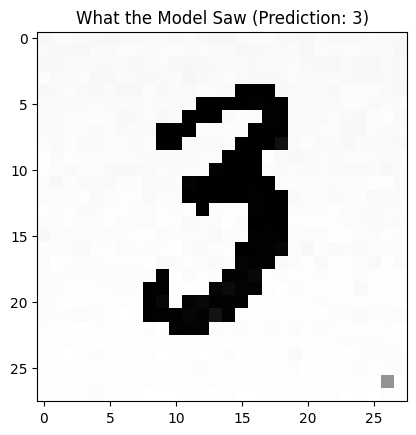

In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


image_path = '/kaggle/input/handwrittendigit1/my_digit.png' 

try:
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')

   
    img_array = img_to_array(img) / 255.0
    
    img_preprocessed = img_array.reshape(1, 784)

    prediction = model.predict(img_preprocessed)
    predicted_digit = np.argmax(prediction)

    print(f"The model predicts the digit is: {predicted_digit}")

    plt.imshow(img_array.reshape(28, 28), cmap='Greys')
    plt.title(f"What the Model Saw (Prediction: {predicted_digit})")
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at '{image_path}'")
    print("Please make sure you have uploaded the file and the path is correct.")